In [1]:
import pandas as pd
import numpy as np
import urllib2
import webbrowser
import os
import bs4,  re
from bs4 import BeautifulSoup
import requests
import math
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

### The cell below opens (and converts to a dataframe) a csv file containing a URL that, when opened, will automatically download a csv file tuned to the prescribed search.  For example, the first search performed looked (1) myeloma, (2) USA, (3) Recruiting AND Non yet recruiting AND Active, but no longer recruiting, (4) Car-T.  The URL syntax can be found at ClinicalTrials.gov site.




In [2]:
df = pd.read_csv('D:\Python_Database\Myeloma\MM Trials\keyword_search.csv')
df1 = pd.read_csv('D:\Python_Database\uscities.csv')

C:\Users\robin\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,label,url
0,CarT,https://clinicaltrials.gov/ct2/results/downloa...
1,MM,https://clinicaltrials.gov/ct2/results/downloa...


### The cells below open the url stored in the dataframe, and then moves the csv file from download to the desired file location


In [4]:
chrome_path = 'C:/Program Files (x86)/Google/Chrome/Application/chrome.exe %s'
url = df['url'].tolist()
webbrowser.get(using=chrome_path).open(url[0])

True

In [5]:
os.rename("C:/Users/robin/Downloads/SearchResults.csv", "D:/Python_Database/Myeloma/MM Trials/CART_Results_" + str(datetime.now())[:10] +".csv")

In [8]:
df = pd.read_csv('D:\Python_Database\Myeloma\MM Trials\CART_Results_' + str(datetime.now())[:10] + '.csv')
df_ = df

In [13]:
df = df[['NCT Number','Title','Locations','Phases', 'Status', 'Interventions', 'Last Update Posted','Sponsor/Collaborators']]

In [14]:
color = ['#0000ff','#0e0dff','#1716ff','#1e1dff','#2323ff','#2828ff','#2c2dff','#2f32ff','#3336ff','#353aff',
         '#383eff','#3b42ff','#3d46ff','#3f49ff','#414dff','#4351ff','#4554ff','#4757ff','#485bff','#4a5eff',
         '#4b61ff','#4d65ff','#4e68ff','#4f6bff','#506eff','#5172ff','#5275ff','#5378ff','#547bff','#547eff',
         '#5581ff','#5684ff','#5687ff','#568bff','#578eff','#5791ff','#5794ff','#5897ff','#589aff','#589dff',
         '#58a0ff','#58a3ff','#57a6ff','#57a9ff','#57acff','#56afff','#56b2ff','#55b5ff','#55b8ff','#54bbff',
         '#53bfff','#52c2ff','#51c5ff','#50c8ff','#4ecbff','#4dceff','#4bd1ff','#4ad4ff','#48d7ff','#46daff',
         '#44ddff','#41e0ff','#3ee3ff','#3be6ff','#38e9ff','#34ecff','#30f0ff','#2bf3ff','#25f6ff','#1df9ff',
         '#13fcff','#00ffff','#08fdfb','#0efbf8','#13f9f4','#17f7f1','#1af6ed','#1df4ea','#1ff2e6','#22f0e3',
         '#23eedf','#25ecdc','#27ead8','#28e8d5','#29e6d1','#2ae5ce','#2be3ca','#2ce1c7','#2ddfc4','#2eddc0',
         '#2fdbbd','#2fdab9','#30d8b6','#30d6b3','#30d4af','#31d2ac','#31d0a8','#31cfa5','#31cda2','#31cb9e',
         '#31c99b','#31c798','#31c594','#31c491','#31c28e','#31c08a','#31be87','#30bc84','#30bb81','#30b97d',
         '#2fb77a','#2fb577','#2eb473','#2eb270','#2db06d','#2dae6a','#2cac66','#2bab63','#2ba960','#2aa75d',
         '#29a559','#28a456','#27a253','#26a04f','#259f4c','#249d49','#239b45','#229942','#20983f','#1f963b',
         '#1e9438','#1c9334','#1a9131','#198f2d','#178d2a','#158c26','#138a22','#10881d','#0e8719','#0a8514',
         '#07830e','#038207','#008000','#0c8200','#158400','#1c8500','#228700','#278900','#2c8b00','#308c00',
         '#358e00','#399000','#3d9200','#419300','#449500','#489700','#4b9900','#4f9a00','#529c00','#569e00',
         '#59a000','#5da100','#60a300','#63a500','#66a700','#6aa900','#6daa00','#70ac00','#73ae00','#76b000',
         '#79b100','#7db300','#80b500','#83b700','#86b900','#89ba00','#8cbc00','#8fbe00','#92c000','#95c200',
         '#99c300','#9cc500','#9fc700','#a2c900','#a5ca00','#a8cc00','#abce00','#aed000','#b1d200','#b4d300',
         '#b7d500','#bad700','#bed900','#c1db00','#c4dc00','#c7de00','#cae000','#cde200','#d0e400','#d3e600',
         '#d6e700','#d9e900','#ddeb00','#e0ed00','#e3ef00','#e6f000','#e9f200','#ecf400','#eff600','#f2f800',
         '#f6fa00','#f9fb00','#fcfd00','#ffff00','#fffc00','#fffa00','#fff700','#fff500','#fff200','#fff000',
         '#ffed00','#ffeb00','#ffe800','#ffe500','#ffe300','#ffe000','#ffde00','#ffdb00','#ffd800','#ffd600',
         '#ffd300','#ffd100','#ffce00','#ffcb00','#ffc900','#ffc600','#ffc300','#ffc100','#ffbe00','#ffbb00',
         '#ffb900','#ffb600','#ffb300','#ffb100','#ffae00','#ffab00','#ffa800','#ffa600','#ffa300','#ffa000',
         '#ff9d00','#ff9a00','#ff9800','#ff9500','#ff9200','#ff8f00','#ff8c00','#ff8900','#ff8600','#ff8300',
         '#ff8000','#ff7d00','#ff7a00','#ff7600','#ff7300','#ff7000','#ff6c00','#ff6900','#ff6500','#ff6200',
         '#ff5e00','#ff5a00','#ff5700','#ff5200','#ff4e00','#ff4a00','#ff4500','#ff4000','#ff3b00','#ff3500',
         '#ff2f00','#ff2800','#ff1f00','#ff1400','#ff0000']

In [16]:
color = color[::len(color)/len(df_)]
# len(color)

24

In [18]:
mask = df['Status'].str.contains('Recruiting', case=True)

colors = color[:len(df['NCT Number'])]
colors = pd.DataFrame(colors)               
colors.columns = ['Color']

df = pd.concat([df, colors], axis=1)

In [19]:
pd.set_option('max_colwidth', 800)
temp = df.reindex(index=df.index[::-1])
temp[['NCT Number','Title', 'Status']]

,NCT Number,Title,Status
21,NCT02529813,CD19+ CAR T Cells for Lymphoid Malignancies,Recruiting
20,NCT02658929,Study of bb2121 in Multiple Myeloma,"Active, not recruiting"
19,NCT03430011,Study Evaluating the Safety and Efficacy of JCARH125 in Subjects With Relapsed and/or Refractory Multiple Myeloma,Recruiting
18,NCT03361748,Efficacy and Safety Study of bb2121 in Subjects With Relapsed and Refractory Multiple Myeloma (KarMMa),"Active, not recruiting"
17,NCT03274219,Study of bb21217 in Multiple Myeloma,Recruiting
16,NCT03318861,A Study Evaluating the Safety and Efficacy of KITE-585 in Subjects With Relapsed/Refractory Multiple Myeloma,Recruiting
15,NCT03548207,"A Study of JNJ-68284528, a Chimeric Antigen Receptor T Cell (CAR-T) Therapy Directed Against B-Cell Maturation Antigen (BCMA) in Participants With Relapsed or Refractory Multiple Myeloma",Recruiting
14,NCT03651128,Efficacy and Safety Study of bb2121 Versus Standard Triplet Regimens in Subjects With Relapsed and Refractory Multiple Myeloma (RRMM),Not yet recruiting
13,NCT02215967,Study of T Cells Targeting B-Cell Maturation Antigen for Previously Treated Multiple Myeloma,"Active, not recruiting"
12,NCT03601078,An Efficacy and Safety Study of bb2121 in Subjects With Relapsed and Refractory Multiple Myeloma and in Subjects With High-Risk Multiple Myeloma Having Progressed Within One Year of Initial Treatment,Recruiting


In [20]:
test_data = df['Locations'].tolist()

In [21]:
city, state, city_state = [], [], []

for i in range(len(df1['city'])):
    city.append(df1['city'][i])
    state.append(df1['state_name'][i])
    city_state.append(city[i] + ', ' + state[i])


In [22]:
results = []

for i in range(len(test_data)):
    for j in range(len(city_state)):
        if str(test_data[i]).find(city_state[j]) >=0:
            results.append(city_state[j])


In [23]:
temp = []
temp1 = []

for i in range(len(test_data)):
    for j in range(len(city_state)):
        if str(test_data[i]).find(city_state[j]) >= 0:

            temp1.append(city_state[j])
    temp.append(temp1)
    temp1=[]
           

In [24]:
location_of_study=[]
for i in range(len(temp)):
    names = set(temp[i])
    names = list(names)
    location_of_study.append(names)

In [25]:
num=[]
for i in range(len(location_of_study)):
    num.append(len(location_of_study[i]))
    

In [26]:
ind, pos = [], []

for i in range(len(num)):
    if num[i] > 1:
        ind.append(num[i])
        pos.append(i)

In [27]:
df = df.reset_index(drop=True)
index = df.index.tolist()

temp = [x*1000 for x in index]

df = df.set_index([temp])

In [28]:
for i in range(len(pos)):
    k=0
    while k < ind[i]:
        df.loc[(pos[i]*1000)+k] = df.loc[pos[i]*1000]
        k=k+1

In [29]:
df = df.sort_index()

In [30]:
new_column = []
for i in range(len(location_of_study)):
    for j in range(len(location_of_study[i])):
        new_column.append(location_of_study[i][j])
               
City_State = pd.DataFrame(new_column, columns=['City, State'])

In [31]:
df_new = pd.concat([df.reset_index(drop=True), City_State], axis=1)
df_new.head()

,NCT Number,Title,Locations,Phases,Status,Interventions,Last Update Posted,Sponsor/Collaborators,Color,"City, State"
0,NCT03549442,Up-front CART-BCMA With or Without huCART19 in High-risk Multiple Myeloma,"Univ. of Pennsylvania, Philadelphia, Pennsylvania, United States",Phase 1,Recruiting,Combination Product: BCMA CART + huCART19|Combination Product: CART BCMA or CART BCMA + huCART19|Combination Product: Single-dose infusion of CART BCMA or CART BCMA + huCART19,"June 20, 2018",University of Pennsylvania|Novartis,#0000ff,"Philadelphia, Pennsylvania"
1,NCT03464916,Study to Evaluate the Safety and Efficacy of Anti-CD38 CAR-T in Relapsed or Refractory Multiple Myeloma Patients,"University of Pennsylvania, Abramson Cancer Center, Philadelphia, Pennsylvania, United States|Roger Williams Medical Center, Providence, Rhode Island, United States",Phase 1,Recruiting,Biological: CAR2 Anti-CD38 A2 CAR-T Cells,"June 27, 2018","Sorrento Therapeutics, Inc.",#3d46ff,"Providence, Rhode Island"
2,NCT03464916,Study to Evaluate the Safety and Efficacy of Anti-CD38 CAR-T in Relapsed or Refractory Multiple Myeloma Patients,"University of Pennsylvania, Abramson Cancer Center, Philadelphia, Pennsylvania, United States|Roger Williams Medical Center, Providence, Rhode Island, United States",Phase 1,Recruiting,Biological: CAR2 Anti-CD38 A2 CAR-T Cells,"June 27, 2018","Sorrento Therapeutics, Inc.",#3d46ff,"Philadelphia, Pennsylvania"
3,NCT02794246,CART-19 Post-ASCT for Multiple Myeloma,"Abramson Cancer Center of the University of Pennsylvania, Philadelphia, Pennsylvania, United States",Phase 2,"Active, not recruiting",Biological: CART-19 cells,"November 15, 2018",University of Pennsylvania,#506eff,"Philadelphia, Pennsylvania"
4,NCT02546167,CART-BCMA Cells for Multiple Myeloma,"Abramson Cancer Center of the University of Pennsylvania, Philadelphia, Pennsylvania, United States",Phase 1,"Active, not recruiting",Biological: CART-BCMA,"October 15, 2018",University of Pennsylvania,#5794ff,"Philadelphia, Pennsylvania"


In [32]:
cit = df1['city'].tolist()
state = df1['state_name'].tolist()

loc_db = []

for i in range(len(cit)):
    loc_db.append(cit[i] + ', ' + state[i])

In [33]:
lat_e, lng_e = [],[] 

citystate = df_new['City, State'].tolist()

for i in range(len(citystate)):
    for j in range(len(loc_db)):
        if citystate[i] == loc_db[j]:
            lng_e.append(df1['lng'][j])
            lat_e.append(df1['lat'][j])
            

In [34]:
lyo = df_new['Last Update Posted'].tolist()

lyo = [2000 + int(x[-2:]) for x in lyo]

In [35]:
LYO = pd.DataFrame(lyo, columns=['Year'])
Lat = pd.DataFrame(lat_e, columns=['Lat'])
Lng = pd.DataFrame(lng_e, columns=['Lng'])

In [36]:
Lat = Lat.reset_index(drop=True)
Lng = Lng.reset_index(drop=True)
LYO = LYO.reset_index(drop=True)


In [37]:
df_new = pd.concat([df_new, Lat, Lng, LYO], axis=1)

df_new.head()

,NCT Number,Title,Locations,Phases,Status,Interventions,Last Update Posted,Sponsor/Collaborators,Color,"City, State",Lat,Lng,Year
0,NCT03549442,Up-front CART-BCMA With or Without huCART19 in High-risk Multiple Myeloma,"Univ. of Pennsylvania, Philadelphia, Pennsylvania, United States",Phase 1,Recruiting,Combination Product: BCMA CART + huCART19|Combination Product: CART BCMA or CART BCMA + huCART19|Combination Product: Single-dose infusion of CART BCMA or CART BCMA + huCART19,"June 20, 2018",University of Pennsylvania|Novartis,#0000ff,"Philadelphia, Pennsylvania",40.0076,-75.1340,2018
1,NCT03464916,Study to Evaluate the Safety and Efficacy of Anti-CD38 CAR-T in Relapsed or Refractory Multiple Myeloma Patients,"University of Pennsylvania, Abramson Cancer Center, Philadelphia, Pennsylvania, United States|Roger Williams Medical Center, Providence, Rhode Island, United States",Phase 1,Recruiting,Biological: CAR2 Anti-CD38 A2 CAR-T Cells,"June 27, 2018","Sorrento Therapeutics, Inc.",#3d46ff,"Providence, Rhode Island",41.8229,-71.4186,2018
2,NCT03464916,Study to Evaluate the Safety and Efficacy of Anti-CD38 CAR-T in Relapsed or Refractory Multiple Myeloma Patients,"University of Pennsylvania, Abramson Cancer Center, Philadelphia, Pennsylvania, United States|Roger Williams Medical Center, Providence, Rhode Island, United States",Phase 1,Recruiting,Biological: CAR2 Anti-CD38 A2 CAR-T Cells,"June 27, 2018","Sorrento Therapeutics, Inc.",#3d46ff,"Philadelphia, Pennsylvania",40.0076,-75.1340,2018
3,NCT02794246,CART-19 Post-ASCT for Multiple Myeloma,"Abramson Cancer Center of the University of Pennsylvania, Philadelphia, Pennsylvania, United States",Phase 2,"Active, not recruiting",Biological: CART-19 cells,"November 15, 2018",University of Pennsylvania,#506eff,"Philadelphia, Pennsylvania",40.0076,-75.1340,2018
4,NCT02546167,CART-BCMA Cells for Multiple Myeloma,"Abramson Cancer Center of the University of Pennsylvania, Philadelphia, Pennsylvania, United States",Phase 1,"Active, not recruiting",Biological: CART-BCMA,"October 15, 2018",University of Pennsylvania,#5794ff,"Philadelphia, Pennsylvania",40.0076,-75.1340,2018


In [38]:
df_new['Status'].unique().tolist()

['Recruiting', 'Active, not recruiting', 'Not yet recruiting']

In [39]:
df_new.head(1)

,NCT Number,Title,Locations,Phases,Status,Interventions,Last Update Posted,Sponsor/Collaborators,Color,"City, State",Lat,Lng,Year
0,NCT03549442,Up-front CART-BCMA With or Without huCART19 in High-risk Multiple Myeloma,"Univ. of Pennsylvania, Philadelphia, Pennsylvania, United States",Phase 1,Recruiting,Combination Product: BCMA CART + huCART19|Combination Product: CART BCMA or CART BCMA + huCART19|Combination Product: Single-dose infusion of CART BCMA or CART BCMA + huCART19,"June 20, 2018",University of Pennsylvania|Novartis,#0000ff,"Philadelphia, Pennsylvania",40.0076,-75.134,2018


In [40]:
NCT_no = df_new['NCT Number'].unique().tolist()
NCT_no[1]

'NCT03464916'

In [41]:
df_new_ = df_new[['NCT Number','Title', 'City, State', 'Lat', 'Lng', 'Color']]

mask2 = []    
for i in range(len(NCT_no)):
    mask2.append(df_new_.mask(df_new_['NCT Number'] != NCT_no[i]).dropna(axis=0, inplace=False).reset_index(drop=True))

mask2[1]

,NCT Number,Title,"City, State",Lat,Lng,Color
0,NCT03464916,Study to Evaluate the Safety and Efficacy of Anti-CD38 CAR-T in Relapsed or Refractory Multiple Myeloma Patients,"Providence, Rhode Island",41.8229,-71.4186,#3d46ff
1,NCT03464916,Study to Evaluate the Safety and Efficacy of Anti-CD38 CAR-T in Relapsed or Refractory Multiple Myeloma Patients,"Philadelphia, Pennsylvania",40.0076,-75.1340,#3d46ff


In [42]:
city_state = df_new['City, State'].unique().tolist()

In [43]:
mask3 = []    
for i in range(len(city_state)):
    mask3.append(df_new_.mask(df_new_['City, State'] != city_state[i]).dropna(axis=0, inplace=False).reset_index(drop=True))

len(mask3[0])

5

In [44]:
city_site = []

for i in range(len(mask3)):
    city_site.append(mask3[i].iloc[0])
    
city_site[0]    

NCT Number                                                                   NCT03549442
Title          Up-front CART-BCMA With or Without huCART19 in High-risk Multiple Myeloma
City, State                                                   Philadelphia, Pennsylvania
Lat                                                                              40.0076
Lng                                                                              -75.134
Color                                                                            #0000ff
Name: 0, dtype: object

In [45]:
for i in range(len(mask3)):
    for j in range(len(mask3[i])):
        if len(mask3[i]) > 1:
            mask3[i]['Lat'][j]  = mask3[i]['Lat'][j] + 1* math.cos(j*math.pi/((7+1)/2.))
            mask3[i]['Lng'][j]  = mask3[i]['Lng'][j] + 1* math.sin(j*math.pi/((7+1)/2.))
        else:
            mask3[i]['Lat'][j] = mask3[i]['Lat'][j]
            mask3[i]['Lng'][j] = mask3[i]['Lng'][j]

C:\Users\robin\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\robin\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\robin\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\robin\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [46]:
mask3[0]

,NCT Number,Title,"City, State",Lat,Lng,Color
0,NCT03549442,Up-front CART-BCMA With or Without huCART19 in High-risk Multiple Myeloma,"Philadelphia, Pennsylvania",41.007600,-75.134000,#0000ff
1,NCT03464916,Study to Evaluate the Safety and Efficacy of Anti-CD38 CAR-T in Relapsed or Refractory Multiple Myeloma Patients,"Philadelphia, Pennsylvania",40.714707,-74.426893,#3d46ff
2,NCT02794246,CART-19 Post-ASCT for Multiple Myeloma,"Philadelphia, Pennsylvania",40.007600,-74.134000,#506eff
3,NCT02546167,CART-BCMA Cells for Multiple Myeloma,"Philadelphia, Pennsylvania",39.300493,-74.426893,#5794ff
4,NCT03288493,P-BCMA-101 Tscm CAR-T Cells in the Treatment of Patients With Multiple Myeloma (MM),"Philadelphia, Pennsylvania",39.007600,-75.134000,#1a9131


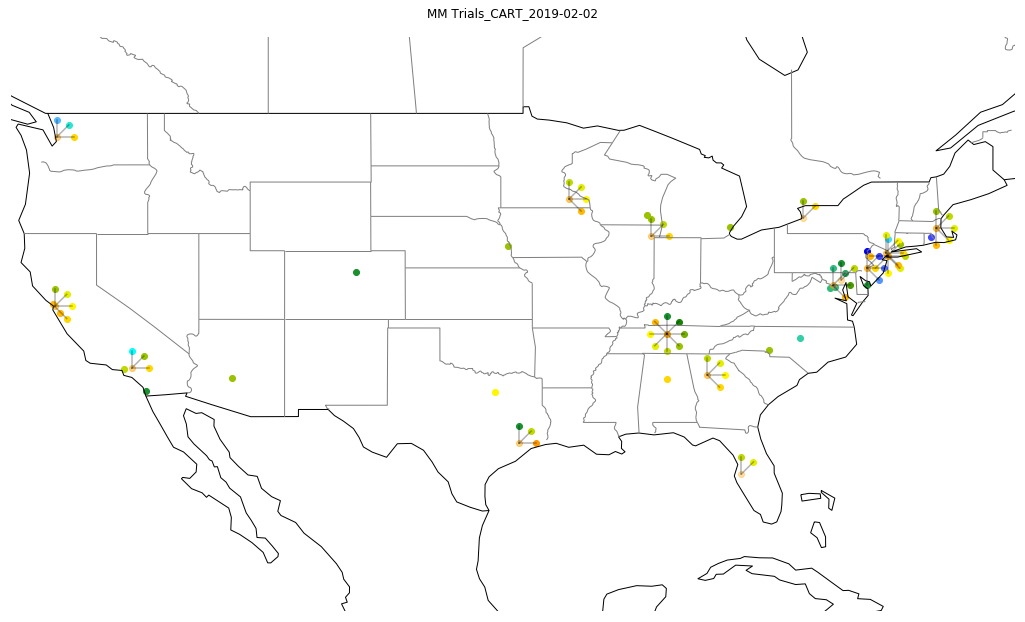

In [47]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(18,16))

states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(states_provinces, edgecolor='gray')
ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)


for i in range(len(mask3)):
    for j in range(len(mask3[i])):
        plt.plot([city_site[i]['Lng'],mask3[i].iloc[j]['Lng']], [city_site[i]['Lat'], mask3[i].iloc[j]['Lat']], c='k', alpha=.3 )
        plt.scatter(city_site[i]['Lng'], city_site[i]['Lat'], c='orange', alpha=0.2)
        plt.scatter(mask3[i].iloc[j]['Lng'], mask3[i].iloc[j]['Lat'], c=mask3[i].iloc[j]['Color'], alpha=1)

plt.savefig('MM Trials_CART_' + str(datetime.now())[:10] + '.png', format='png', dpi=600, transparent=True)
plt.title('MM Trials_CART_' + str(datetime.now())[:10] + '\n')
plt.show()

In [48]:
mask2[1].iloc[0]['NCT Number']

'NCT03464916'

In [49]:
city_lng, city_lat, city_name = [],[],[]
for i in range(len(city_site)):
    city_lng.append(city_site[i]['Lng'].tolist())
    city_lat.append(city_site[i]['Lat'].tolist())
    city_name.append(city_site[i]['City, State'])
    
jit_lng, jit_lat, jit_trial_no, jit_trial_name = [],[],[],[]
for i in range(len(mask3)):
    for j in range(len(mask3[i])):
        jit_lng.append(mask3[i].iloc[j]['Lng'])
        jit_lat.append(mask3[i].iloc[j]['Lat'])
        jit_trial_no.append(mask3[i].iloc[j]['NCT Number'])
        jit_trial_name.append(mask3[i].iloc[j]['Title'])



In [50]:
import folium

In [51]:
colors = []
for i in range(len(mask3)):
    for j in range(len(mask3[i])):
        colors.append(mask3[i].iloc[j]['Color'])

In [75]:



map = folium.Map(location = [38.58, -99.09], zoom_start=3.5, prefer_canvas=True, tiles = 'cartodbdark_matter', control_scale=True)
fg = folium.FeatureGroup(name = "My Map")

        
for lat, lng, number, name, col in zip(jit_lat, jit_lng, jit_trial_no, jit_trial_name, colors):
    fg.add_child(folium.CircleMarker(location = [lat, lng], popup = number + ', ' + name, radius = 3, color = col))
    
for lat, lng, city in zip(city_lat, city_lng, city_name): 
    fg.add_child(folium.CircleMarker(location = [lat, lng], popup = city, radius = .2, color = "magenta"))

segments = []
for i in range(len(city_site)):
    for j in range(len(mask3[i])):
        segments.append(tuple([[city_site[i]['Lat'], city_site[i]['Lng']], [mask3[i].iloc[j]['Lat'], mask3[i].iloc[j]['Lng']]]))

for i in range(len(segments)):
    fg.add_child(folium.PolyLine(locations=segments[i], color="white", weight=.10, opacity=20))
    
print 'CAR-T Trials in US as of ' + str(datetime.now())[:10]
map.add_child(fg)
map.save("Map1" + str(datetime.now())[:10] + ".html")
map

CAR-T Trials in US as of 2019-02-02


In [54]:
NCT_No = []
length = []

for i in range(len(mask2)):
    NCT_No.append(mask2[i].iloc[0]['NCT Number'])
    length.append(len(mask2[i]))

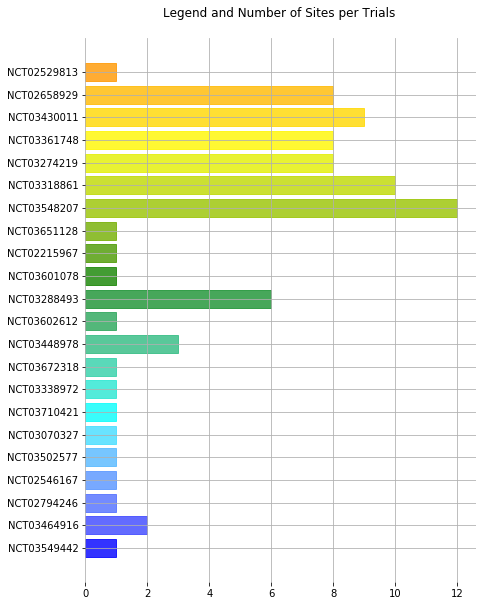

In [56]:
plt.figure(figsize=(7,10))
ax1 = plt.axes(frameon=False)
barlist = plt.barh(df_['NCT Number'].tolist(), length, alpha = 0.8)
for i in range(len(barlist)):
    barlist[i].set_color(color[i])
plt.grid()
plt.title('Legend and Number of Sites per Trials \n')
plt.savefig('Legend_CART ' + str(datetime.now())[:10] + '.png', format='png', dpi=600, bbox_inches="tight", transparent=True)
plt.show()


In [57]:
from matplotlib.pyplot import figure
import mpld3

fig = plt.figure(figsize=(7,10))
plt.gca()
plt.axes(frameon=False)
barlist = plt.barh(df_['NCT Number'].tolist(), length, alpha = 0.8)

for i in range(len(barlist)):
    barlist[i].set_color(color[i])




plt.grid()
plt.title('Legend and Number of Sites per Trials as of ' + str(datetime.now())[:10] + '\n')


mpld3.display()

In [58]:
mpld3.save_html(fig,'Legend_' + str(datetime.now())[:10] +'.html')

In [59]:
df_['NCT Number'].tolist()

['NCT03549442',
 'NCT03464916',
 'NCT02794246',
 'NCT02546167',
 'NCT03502577',
 'NCT03070327',
 'NCT03710421',
 'NCT03338972',
 'NCT03672318',
 'NCT03448978',
 'NCT03602612',
 'NCT03288493',
 'NCT03601078',
 'NCT02215967',
 'NCT03651128',
 'NCT03548207',
 'NCT03318861',
 'NCT03274219',
 'NCT03361748',
 'NCT03430011',
 'NCT02658929',
 'NCT02529813']

In [60]:
import pygal  

# from pygal.style import Style
# custom_style = Style(
#   background='transparent',
#   plot_background='transparent',
#   foreground='#53E89B',
#   foreground_strong='#53A0E8',
#   foreground_subtle='#630C0D',
#   opacity='.6',
#   opacity_hover='.9',
#   transition='400ms ease-in',
#   colors=colors)

In [61]:
# bar_chart = pygal.HorizontalBar()
# for i in range(len(length)):
    
#     bar_chart.add(df_['NCT Number'].tolist()[i], length[i])
    
# bar_chart.render_to_file('bar_chart.svg')

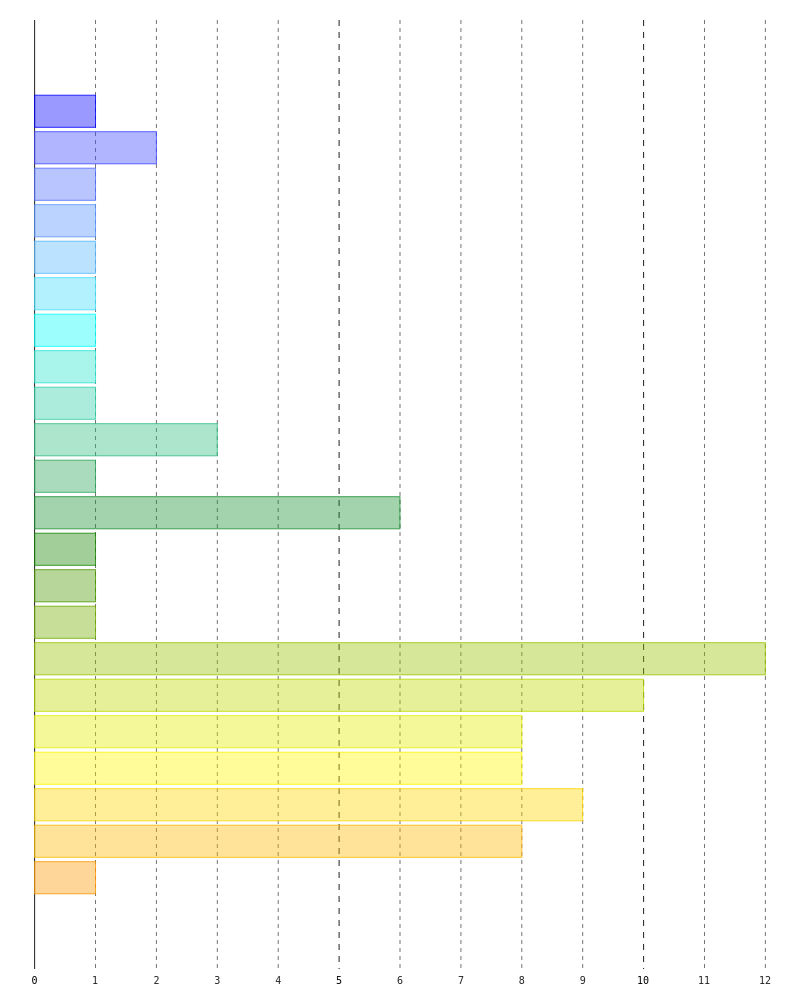

In [62]:
import pygal

from IPython.display import SVG, display
from pygal.style import Style
custom_style = Style(
  background='transparent',
  plot_background='transparent',
#   foreground='#53E89B',
#   foreground_strong='#53A0E8',
#   foreground_subtle='#630C0D',
  
  opacity='.4',
  opacity_hover='.5',
  transition='400ms ease-in',
  colors=(color))

# chart = pygal.StackedLine(fill=True, interpolate='cubic', )
bar_chart = pygal.HorizontalBar(show_legend=False,  height = 1000, spacing = 1, style=custom_style)

for i in range(len(length)):
#     bar_chart.add(df_['NCT Number'].tolist()[i], )
    bar_chart.add(df_['NCT Number'].tolist()[i], [{'value': length[i], 'label': df_['Title'].tolist()[i]}])

# chart.add('A', [1, 3,  5, 16, 13, 3,  7])
# chart.add('B', [5, 2,  3,  2,  5, 7, 17])
# chart.add('C', [6, 10, 9,  7,  3, 1,  0])
# chart.add('D', [2,  3, 5,  9, 12, 9,  5])
# chart.add('E', [7,  4, 2,  1,  2, 10, 0])
display({'image/svg+xml': bar_chart.render()}, raw=True)
bar_chart.render_to_file('bar_chart1' + str(datetime.now())[:10] + '.svg')